In [1]:
using PyPlot, JLD, AnomalyDetection, EvalCurves
import PyPlot: plot
include("./plots.jl")

PyPlot.plot

In [2]:
# load data
dataset = load("toy_data_3.jld")["data"]
X = AnomalyDetection.Float.(dataset.data)
Y = dataset.labels
nX = X[:, Y.==0]
M, N = size(X)

(2, 103)

In [3]:
# GAN settings
zdim = 1 # code dimension
xdim = M # dimension of data
hiddendim = 32  

# setup the GAN model object
gsize = [zdim; hiddendim; hiddendim; xdim] # generator layout
dsize = [xdim; hiddendim*2; hiddendim*2; 1] # discriminator layout
lambda = 0.5 # anomaly score parameter in [0, 1]
# 1 - ignores the discriminator score
# 0- ignores the reconstruction error score
threshold = 0 # classification threshold, is recomputed (getthreshold or when using fit!)
contamination = size(Y[Y.==1],1)/size(Y, 1) # contamination ratio
batchsize = 30 # batchsize
iterations = 15000 # no of iterations
cbit = 5000 # when should output be printed
nepochs = Int(ceil(batchsize*iterations/size(nX,2))) # if this is supplied, do epoch training
verbfit = true # if output should be produced
pz = randn # code distribution (rand should also work)
activation = Flux.leakyrelu # should work better than relu
layer = Flux.Dense
rdelta = 1e-5 # stop training after this reconstruction error is achieved
# this parameter is basically useless in the case of GANs
Beta = 1.0 # for automatic threshold computation, in [0, 1] 
# 1.0 = tight around normal samples
tracked = true # do you want to store training progress?
# it can be later retrieved from model.traindata
eta = 0.001
model = GANmodel(gsize, dsize; lambda=lambda, threshold=threshold, 
    contamination=contamination, batchsize=batchsize, iterations=iterations, 
    cbit=cbit, nepochs = nepochs, verbfit=verbfit, 
    pz = pz, activation = activation, rdelta = rdelta, Beta = Beta, 
    layer = layer, tracked = tracked, eta = eta)

AnomalyDetection.GANmodel(AnomalyDetection.GAN(Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), randn), 0.5, 0, 0.1262135922330097, 30, 15000, 5000, 5000, true, 1.0f-5, 1.0f0, MVHistory{ValueHistories.History}, 0.001)

In [4]:
# fit the model
Z = AnomalyDetection.getcode(model, size(nX,2))
AnomalyDetection.evalloss(model, nX, Z)
AnomalyDetection.fit!(model, nX)
AnomalyDetection.evalloss(model, nX, Z)

discriminator loss: 0.71157897
generator loss: 0.7030131
reconstruction error: 0.5159041

epochs


Progress:   0%|                                         |  ETA: 10:04:55
  discriminator loss:    0.7004436
  generator loss:        0.70112365
Progress:   1%|                                         |  ETA: 0:06:03
  discriminator loss:    0.6234931
  generator loss:        0.92832214
Progress:   1%|█                                        |  ETA: 0:03:55
  discriminator loss:    0.66545963
  generator loss:        0.82191086
Progress:   2%|█                                        |  ETA: 0:03:01
  discriminator loss:    0.65742517
  generator loss:        0.71611416
Progress:   3%|█                                        |  ETA: 0:02:30
  discriminator loss:    0.65990007
  generator loss:        0.7690187
Progress:   3%|█                                        |  ETA: 0:02:12
  discriminator loss:    0.7200295
  generator loss:        0.71498615
Progress:   4%|██                                       |  ETA: 0:01:59
  discriminator loss:    0.68074346
  generator loss:        0.6785

Progress:  28%|███████████                              |  ETA: 0:00:44
  discriminator loss:    0.6878559
  generator loss:        0.74567044
Progress:  28%|████████████                             |  ETA: 0:00:44
  discriminator loss:    0.68374336
  generator loss:        0.8789471
Progress:  29%|████████████                             |  ETA: 0:00:43
  discriminator loss:    0.663337
  generator loss:        0.83839196
Progress:  29%|████████████                             |  ETA: 0:00:43
  discriminator loss:    0.6623454
  generator loss:        0.74373066
Progress:  30%|████████████                             |  ETA: 0:00:42
  discriminator loss:    0.7259196
  generator loss:        0.68009853
Progress:  31%|█████████████                            |  ETA: 0:00:42
  discriminator loss:    0.7019914
  generator loss:        0.6826828
Progress:  31%|█████████████                            |  ETA: 0:00:41
  discriminator loss:    0.71502185
  generator loss:        0.6512054
P

Progress:  55%|██████████████████████                   |  ETA: 0:00:25
  discriminator loss:    0.68217885
  generator loss:        0.7879627
Progress:  55%|███████████████████████                  |  ETA: 0:00:25
  discriminator loss:    0.6841666
  generator loss:        0.69969296
Progress:  56%|███████████████████████                  |  ETA: 0:00:25
  discriminator loss:    0.7041625
  generator loss:        0.667312
Progress:  57%|███████████████████████                  |  ETA: 0:00:24
  discriminator loss:    0.7019661
  generator loss:        0.69336337
Progress:  57%|███████████████████████                  |  ETA: 0:00:24
  discriminator loss:    0.6969998
  generator loss:        0.67224765
Progress:  58%|████████████████████████                 |  ETA: 0:00:24
  discriminator loss:    0.6821233
  generator loss:        0.7477377
Progress:  58%|████████████████████████                 |  ETA: 0:00:23
  discriminator loss:    0.69802916
  generator loss:        0.67037416
P

Progress:  82%|██████████████████████████████████       |  ETA: 0:00:10
  discriminator loss:    0.7059409
  generator loss:        0.693924
Progress:  83%|██████████████████████████████████       |  ETA: 0:00:09
  discriminator loss:    0.6850817
  generator loss:        0.660075
Progress:  84%|██████████████████████████████████       |  ETA: 0:00:09
  discriminator loss:    0.6991129
  generator loss:        0.72169137
Progress:  84%|███████████████████████████████████      |  ETA: 0:00:09
  discriminator loss:    0.69411826
  generator loss:        0.6839518
Progress:  85%|███████████████████████████████████      |  ETA: 0:00:08
  discriminator loss:    0.68443084
  generator loss:        0.7527086
Progress:  85%|███████████████████████████████████      |  ETA: 0:00:08
  discriminator loss:    0.68084955
  generator loss:        0.6883946
Progress:  86%|███████████████████████████████████      |  ETA: 0:00:08
  discriminator loss:    0.7012067
  generator loss:        0.720027
Progr

15000
discriminator loss: 0.7032791
generator loss: 0.67658734
reconstruction error: 0.15080102



Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00
  discriminator loss:    0.69501156
  generator loss:        0.69194955
Progress: 100%|█████████████████████████████████████████| Time: 0:00:54
  discriminator loss:    0.7059115
  generator loss:        0.67199063
  reconstruction error:  0.13399103


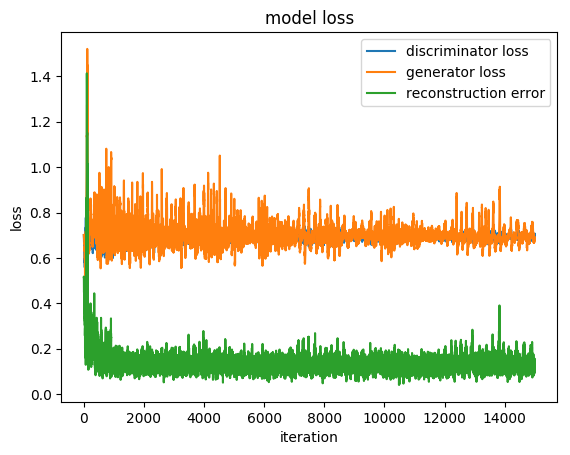

In [5]:
# plot model loss
plot(model)
show()

In [6]:
# generate new data
xgen = AnomalyDetection.generate(model, N)

2×103 Array{Float32,2}:
 0.597346  0.490438  0.601608  0.0288874  …  0.604022  0.470397  0.0121911
 0.573267  0.448607  0.587824  0.997237      0.58714   0.427359  1.0746   

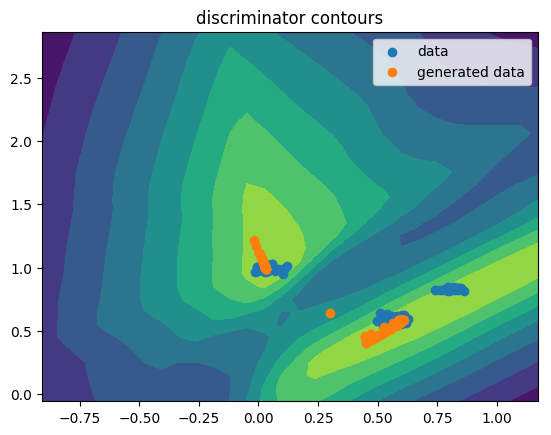

In [7]:
# plot them
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)


x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.discriminate(model, AnomalyDetection.Float.([x[j], y[i]]))[1]
    end
end

figure()
contourf(x, y, zz)
scatter(nX[1,:], nX[2,:], label = "data")
scatter(xgen[1,:], xgen[2,:], label = "generated data")
title("discriminator contours")
xlim(xl)
ylim(yl)
legend()
show()

Classification is based on anomaly score computed as a weighted average of reconstruction error and discriminator score
\begin{equation}
A(x) = (1-\lambda)D(x)+\lambda||x-G(z)||_{2, z \sim p(z)}
\end{equation}

In [8]:
# predict labels
AnomalyDetection.setthreshold!(model, X)
tryhat = AnomalyDetection.predict(model, X)

103-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 1
 1
 0
 1
 1
 1
 0
 1
 1
 0
 1

In [9]:
# get all the labels
tryhat, tstyhat, _, _ = AnomalyDetection.rocstats(dataset, dataset, model);


 Training data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 11
  tn = 87
  fp = 3
  fn = 2
precision: 0.7857142857142857
f1score: 0.8148148148148148
recall: 0.8461538461538461
false positive rate: 0.03333333333333333
equal error rate: 0.09358974358974359

 Testing data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 9
  tn = 88
  fp = 2
  fn = 4
precision: 0.8181818181818182
f1score: 0.75
recall: 0.6923076923076923
false positive rate: 0.022222222222222223
equal error rate: 0.16495726495726495


In [10]:
# anomaly score contour plot
# get limits of the figure
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)

# compute the anomaly score on a grid
x = linspace(xl[1], xl[2], 30)
y = linspace(yl[1], yl[2], 30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.anomalyscore(model, AnomalyDetection.Float.([x[j], y[i]]))
    end
end

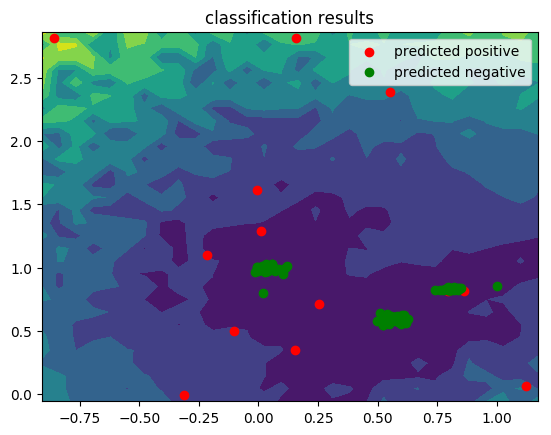

In [11]:
# plot it all
f = figure()
contourf(x, y, zz)
scatter(X[1, tryhat.==1], X[2, tryhat.==1], c = "r", 
    label = "predicted positive")
scatter(X[1, tryhat.==0], X[2, tryhat.==0], c = "g", 
    label = "predicted negative")
title("classification results")
xlim(xl)
ylim(yl)
legend()
show()

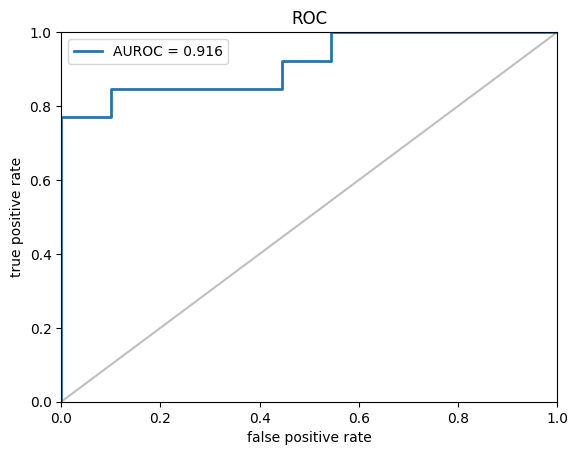

In [12]:
# plot ROC curve and compute AUROC score
ascore = AnomalyDetection.anomalyscore(model, X);
fprvec, tprvec = EvalCurves.roccurve(ascore, Y)
auroc = round(EvalCurves.auc(fprvec, tprvec),3)
EvalCurves.plotroc((fprvec, tprvec, "AUROC = $(auroc)"))
show()

In [13]:
# plot EER for different settings of lambda
using MLBase: roc, correctrate, precision, recall, f1score, false_positive_rate, false_negative_rate
n = 21
lvec = linspace(0,1,n)
eervec = zeros(n)
for i in 1:n
    model.lambda = lvec[i]
    AnomalyDetection.setthreshold!(model, X)
    tryhat, tsthat, trroc, tstroc = AnomalyDetection.rocstats(dataset.data, dataset.labels,
        dataset.data, dataset.labels, model, verb = false)
    eervec[i] = (false_positive_rate(tstroc) + false_negative_rate(tstroc))/2
end

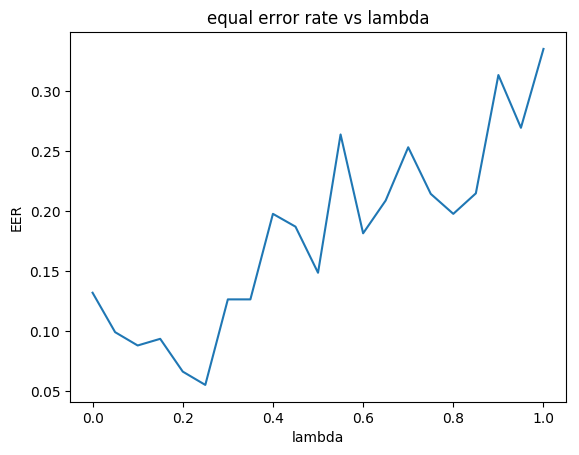

In [14]:
f = figure()
plot(lvec, eervec)
title("equal error rate vs lambda")
xlabel("lambda")
ylabel("EER")
show()